index: '0', key: 'erode', value: '<function erode at 0x7f53f715a5f0>'
index: '1', key: 'dilate', value: '<function dilate at 0x7f53f6c33f80>'
index: '2', key: 'closing', value: '<function closing at 0x7f53f6c33680>'
index: '3', key: 'opening', value: '<function opening at 0x7f53f6c33a70>'
index: '4', key: 'gradient', value: '<function morphological_gradient at 0x7f53f6c33200>'
index: '5', key: 'closing|opening', value: '<function closing_and_opening at 0x7f53f7225320>'
index: '6', key: 'opening|closing', value: '<function opening_and_closing at 0x7f53f7113200>'


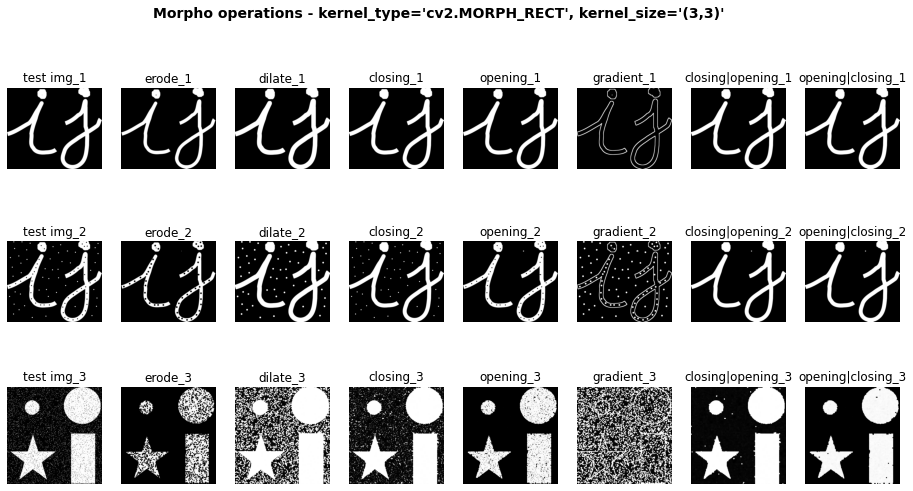

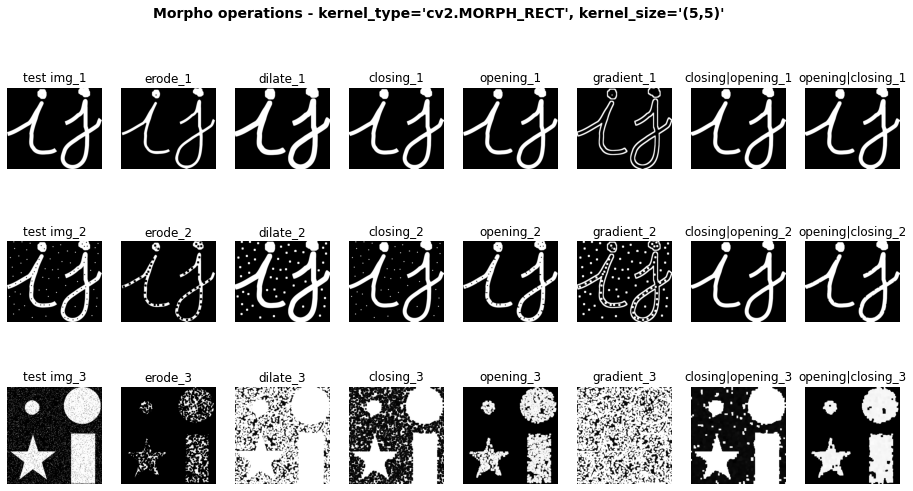

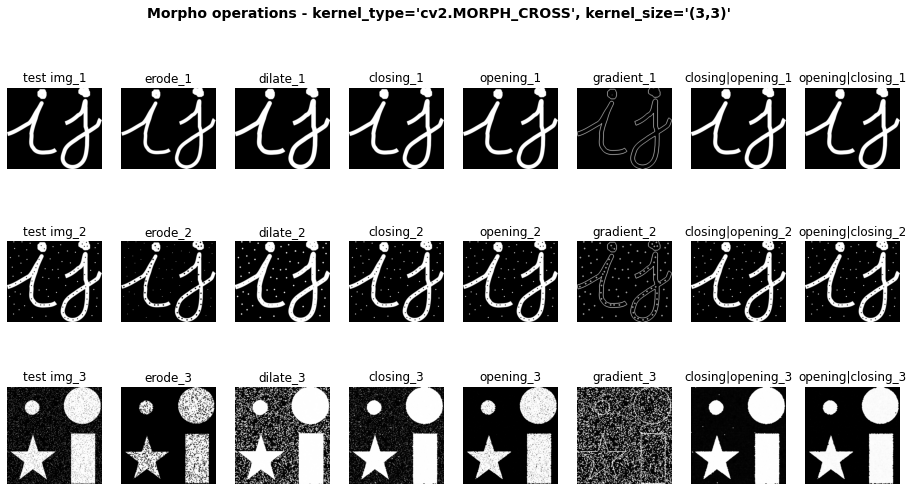

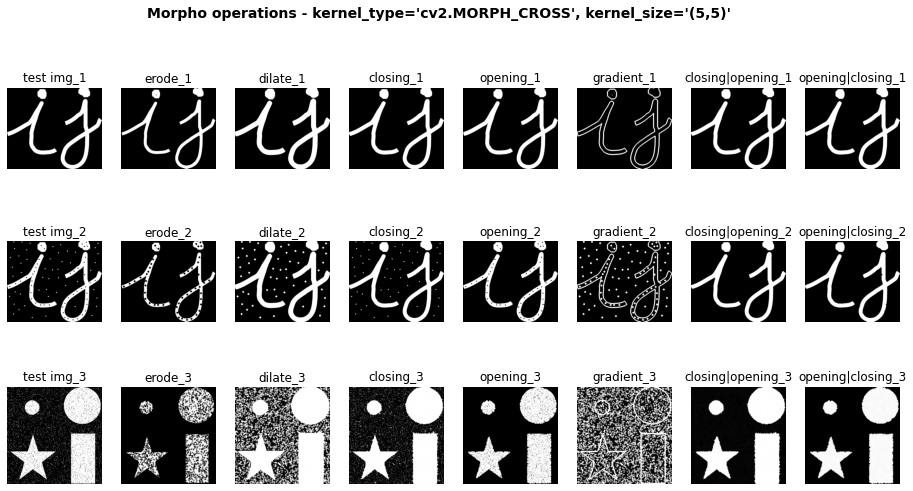

In [8]:
"""
Morphological operations
"""

# Import required packages:
import cv2
import matplotlib.pyplot as plt
import os

# Name and path of the test images to load:
image_names = ['test1.png', 'test2.png', 'test3.png']
path = 'images'

# The two kernel sizes that we are going to use in our testing:
kernel_size_3_3 = (3, 3)
kernel_size_5_5 = (5, 5)


# Load all test images building the relative path using 'os.path.join'
def load_all_test_images():
    """Loads all the test images to be used for testing"""

    test_morph_images = []
    for index_image, name_image in enumerate(image_names):
        # Build the relative path where the current image is:
        image_path = os.path.join(path, name_image)
        # print("image_path: '{}'".format(image_path))
        # Read the image and add it (append) to the structure 'test_morph_images'
        test_morph_images.append(cv2.imread(image_path))
    # Return all the loaded test images:
    return test_morph_images


# Show all the images of the array creating the name and position for each one
# The images of the array 'array_img' will be plotted in the same column and taken into account that
# each row will have (len(morphological_operations) + 1) components because we want to plot all
# the morphological operation results and the original test images.
# For example, the indexes for the first, second and third array images are specified:
# first array: (1 , 9 , 17), second array: (2 , 10, 18), third array: (3, 11, 19)
def show_images(array_img, title, pos):
    """Shows of the images of the array"""

    for index_image, image in enumerate(array_img):
        # print("Position to plot the image: '{}'".format(pos + index_image * (len(morphological_operations) + 1)))
        show_with_matplotlib(image, title + "_" + str(index_image + 1),
                             pos + index_image * (len(morphological_operations) + 1))


# Shows the image 'color_img' in the indicated position 'pos' with specified title
def show_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(len(image_names), len(morphological_operations) + 1, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


# This function creates the specific kernel to be used when performing the morphological operations
def build_kernel(kernel_type, kernel_size):
    """Creates the specific kernel: MORPH_ELLIPSE, MORPH_CROSS or MORPH_RECT"""

    if kernel_type == cv2.MORPH_ELLIPSE:
        # We build a elliptical kernel
        return cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
    elif kernel_type == cv2.MORPH_CROSS:
        # We build a cross-shape kernel
        return cv2.getStructuringElement(cv2.MORPH_CROSS, kernel_size)
    else:  # cv2.MORPH_RECT
        # We build a rectangular kernel:
        return cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)


# This function erodes the image
def erode(image, kernel_type, kernel_size):
    """Erodes the image with the specified kernel type and size"""

    kernel = build_kernel(kernel_type, kernel_size)
    erosion = cv2.erode(image, kernel, iterations=1)
    return erosion


# This function dilates the image
def dilate(image, kernel_type, kernel_size):
    """Dilates the image with the specified kernel type and size"""

    kernel = build_kernel(kernel_type, kernel_size)
    dilation = cv2.dilate(image, kernel, iterations=1)
    return dilation


# This function closes the image
# Closing = dilation + erosion
def closing(image, kernel_type, kernel_size):
    """Closes the image with the specified kernel type and size"""

    kernel = build_kernel(kernel_type, kernel_size)
    clos = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    return clos


# This function opens the image
# Opening = erosion + dilation
def opening(image, kernel_type, kernel_size):
    """Opens the image with the specified kernel type and size"""

    kernel = build_kernel(kernel_type, kernel_size)
    ope = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    return ope


# This function applies the morphological gradient to the image
def morphological_gradient(image, kernel_type, kernel_size):
    """Applies the morfological gradient to the image with the specified kernel type and size"""

    kernel = build_kernel(kernel_type, kernel_size)
    morph_gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
    return morph_gradient


# This function closes and opens the image
def closing_and_opening(image, kernel_type, kernel_size):
    """Closes and opens the image with the specified kernel type and size"""

    closing_img = closing(image, kernel_type, kernel_size)
    opening_img = opening(closing_img, kernel_type, kernel_size)
    return opening_img


# This function opens and closes the image
def opening_and_closing(image, kernel_type, kernel_size):
    """Open and closes the image with the specified kernel type and size"""

    opening_img = opening(image, kernel_type, kernel_size)
    closing_img = closing(opening_img, kernel_type, kernel_size)
    return closing_img


# Implemented morphological operations to be used
# The key identifies the morphological operation to be used
# The value is the function to be called when the corresponding key is used
morphological_operations = {
    'erode': erode,
    'dilate': dilate,
    'closing': closing,
    'opening': opening,
    'gradient': morphological_gradient,
    'closing|opening': closing_and_opening,
    'opening|closing': opening_and_closing
}


# Apply the 'morphological_operation' (e.g. 'erode', 'dilate', 'closing') to all the images in the array
def apply_morphological_operation(array_img, morphological_operation, kernel_type, kernel_size):
    """Applies the defined morphological operations to the array of images with the specified kernel type and size"""

    morphological_operation_result = []
    for index_image, image in enumerate(array_img):
        result = morphological_operations[morphological_operation](image, kernel_type, kernel_size)
        morphological_operation_result.append(result)
    return morphological_operation_result


# Show the morphological_operations dictionary
# This is only for debugging purposes
for i, (k, v) in enumerate(morphological_operations.items()):
    print("index: '{}', key: '{}', value: '{}'".format(i, k, v))

# We load all the test images:
test_images = load_all_test_images()

# create a figure() object with appropriate size and title:
plt.figure(figsize=(16, 8))
plt.suptitle("Morpho operations - kernel_type='cv2.MORPH_RECT', kernel_size='(3,3)'", fontsize=14, fontweight='bold')

# We plot the test images:
show_images(test_images, "test img", 1)

# We apply each morphological operation to all the test images and, afterwards, show them:
for i, (k, v) in enumerate(morphological_operations.items()):
    show_images(apply_morphological_operation(test_images, k, cv2.MORPH_RECT, kernel_size_3_3), k, i + 2)

# Show the created image:
plt.show()

# create a figure() object with appropriate size and title:
plt.figure(figsize=(16, 8))
plt.suptitle("Morpho operations - kernel_type='cv2.MORPH_RECT', kernel_size='(5,5)'", fontsize=14, fontweight='bold')

# We plot the test images:
show_images(test_images, "test img", 1)

# We apply each morphological operation to all the test images and, afterwards, show them:
for i, (k, v) in enumerate(morphological_operations.items()):
    show_images(apply_morphological_operation(test_images, k, cv2.MORPH_RECT, kernel_size_5_5), k, i + 2)

# Show the created image:
plt.show()

# create a figure() object with appropriate size and title:
plt.figure(figsize=(16, 8))
plt.suptitle("Morpho operations - kernel_type='cv2.MORPH_CROSS', kernel_size='(3,3)'", fontsize=14, fontweight='bold')

# We plot the test images:
show_images(test_images, "test img", 1)

# We apply each morphological operation to all the test images and, afterwards, show them:
for i, (k, v) in enumerate(morphological_operations.items()):
    show_images(apply_morphological_operation(test_images, k, cv2.MORPH_CROSS, kernel_size_3_3), k, i + 2)

# Show the created image:
plt.show()

# create a figure() object with appropriate size and title:
plt.figure(figsize=(16, 8))
plt.suptitle("Morpho operations - kernel_type='cv2.MORPH_CROSS', kernel_size='(5,5)'", fontsize=14, fontweight='bold')

# We plot the test images:
show_images(test_images, "test img", 1)

# We apply each morphological operation to all the test images and, afterwards, show them:
for i, (k, v) in enumerate(morphological_operations.items()):
    show_images(apply_morphological_operation(test_images, k, cv2.MORPH_CROSS, kernel_size_5_5), k, i + 2)

# Show the created image:
plt.show()